## LOAN DATASET

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import KFold
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
train_df=pd.read_csv('E:/Machine Learning/AnalyticsVidhyaProblems/loan_train.csv')

In [3]:
train_df.shape

(614, 13)

In [4]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


## Actual Data Type

<b>Categorical</b>
- Gender
- Married
- Education
- Self_Employed
- Credit_History
- Property Area
- Loan Status

<b> Continous </b>
- Dependents
- ApplicantIncome
- CoapplicantIncome
- LoanAmount
- Loan_Amount_Term

<b>Output Variable</b>
- Loan_Status

In [6]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- ApplicantIncome is negatively Skewed as Mean is greater than Median which can be possible due to extreme Income values
- Same observation for CoapplicantIncome
- 84% people have credit history value while only 16% doesnot have

In [7]:
#Null count
train_df.apply(lambda x:sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Visualizing the Data

In [8]:
# Defining a function to provide percentages for cross tabs
def pctg(ser):
    return ser/float(ser[-1])

### Gender

In [9]:
train_df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

There are roughly 20% female in the dataset while more than 80% is male

In [10]:
#Lets check the Loan status for genders
pd.crosstab(train_df.Gender,columns=train_df.Loan_Status,margins=True).apply(pctg,axis=1)

Loan_Status,N,Y,All
Gender,,,
Female,0.330357,0.669643,1.0
Male,0.306748,0.693252,1.0
All,0.311148,0.688852,1.0


- Out of total female,67% of the female got loan while 33% female's loan were rejected
- Out of total male,70% of the male got loan while 30% male's loan were rejected
- Overall 69% of the people got loan while for rest 31% it was rejected

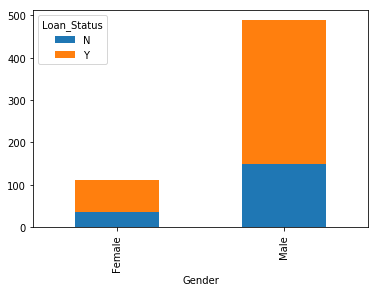

In [11]:
gender_tab=pd.crosstab(train_df.Gender,columns=train_df.Loan_Status)
gender_tab.plot(kind='bar',stacked=True)

### Married

In [12]:
train_df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

Out of total population 65% are Married while 35% Bachelors

In [13]:
pd.crosstab(train_df.Married,columns=train_df.Loan_Status,margins=True).apply(pctg,axis=1)

Loan_Status,N,Y,All
Married,,,
No,0.370892,0.629108,1.0
Yes,0.283920,0.716080,1.0
All,0.314239,0.685761,1.0


- Out of total Bachelors 63% got loan while 37% dint get.
- Out of total married person 71% got loan while 28% dint get.

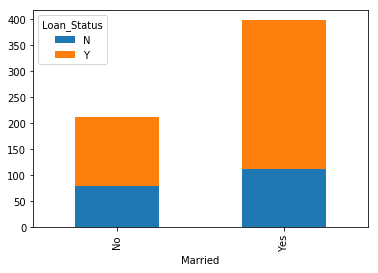

In [14]:
married_tab=pd.crosstab(train_df.Married,columns=train_df.Loan_Status)
married_tab.plot(kind='bar',stacked=True)

<Figure size 720x720 with 0 Axes>

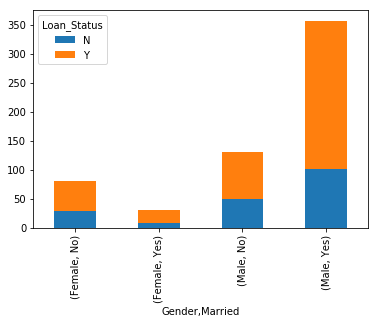

<Figure size 720x720 with 0 Axes>

In [15]:
grouby_tab=train_df.groupby(['Gender','Married','Loan_Status'])['Loan_Status'].count()
grouby_tab.unstack().plot(kind='bar',legend=True,stacked=True)
plt.figure(figsize=(10,10))

### Dependents

In [16]:
train_df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
dependent_tab=pd.crosstab(train_df.Dependents,columns=train_df.Loan_Status)
dependent_tab

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


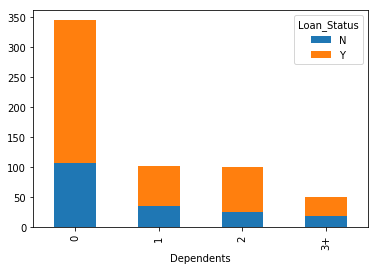

In [18]:
dependent_tab.plot(kind='bar',stacked=True)

### Education

In [19]:
train_df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [20]:
pd.crosstab(train_df.Education,columns=train_df.Loan_Status,margins=True).apply(pctg,axis=1)

Loan_Status,N,Y,All
Education,,,
Graduate,0.291667,0.708333,1.0
Not Graduate,0.388060,0.611940,1.0
All,0.312704,0.687296,1.0


- 71% of the Graduate got loan while 29% of them dint
- 61% of the non graduate also got loan.

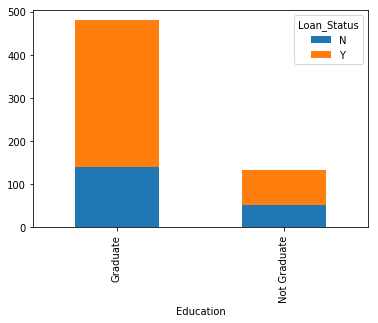

In [21]:
education_tab=pd.crosstab(train_df.Education,columns=train_df.Loan_Status)
education_tab.plot(kind='bar',stacked=True)

In [22]:
train_df.groupby(['Loan_Status','Education'])[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].agg(['mean','median'])

ApplicantIncome         CoapplicantIncome          \
                                    mean  median              mean  median   
Loan_Status Education                                                        
N           Graduate         6114.514286  4256.5       2111.028571     0.0   
            Not Graduate     3646.442308  3279.0       1249.903846  1127.5   
Y           Graduate         5751.576471  3913.5       1555.423294  1146.5   
            Not Graduate     3860.256098  3378.0       1293.439024  1443.0   

                          LoanAmount        Loan_Amount_Term         
                                mean median             mean median  
Loan_Status Education                                                
N           Graduate      161.388060  135.0       350.364964  360.0  
            Not Graduate  122.234043  120.0       326.448980  360.0  
Y           Graduate      151.093656  130.0       342.340299  360.0  
            Not Graduate  116.162500  113.0       335.696203  360.0

From the above table it seems income is not the most imporatant factor in loan decision which we generally assume.

### Self_Employed

In [23]:
train_df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Only 14% of the population is Self Employed.

In [24]:
pd.crosstab(train_df.Self_Employed,columns=train_df.Loan_Status,margins=True).apply(pctg,axis=1)

Loan_Status,N,Y,All
Self_Employed,,,
No,0.314000,0.686000,1.0
Yes,0.317073,0.682927,1.0
All,0.314433,0.685567,1.0


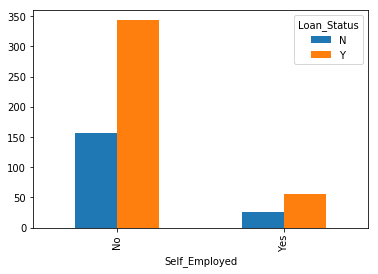

In [25]:
Self_Employed_tab=pd.crosstab(train_df.Self_Employed,columns=train_df.Loan_Status)
Self_Employed_tab.plot(kind='bar')

### ApplicantIncome

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BEDFB38>]],
      dtype=object)

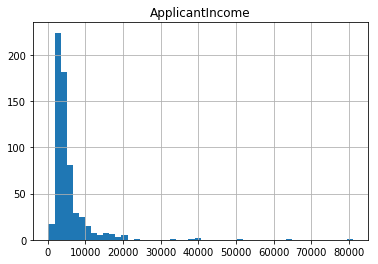

In [26]:
train_df.hist('ApplicantIncome',bins=50)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C367A20>,
      dtype=object)

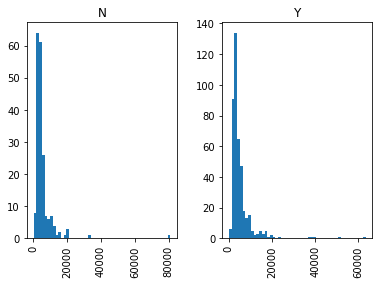

In [27]:
train_df.hist('ApplicantIncome',by='Loan_Status',bins=50)

As we can see from the above graph pattern of Income for both Loan status is alsmost similar.This confirms our assumption that ApplicantIncome is not the  most important deciding factor for loan

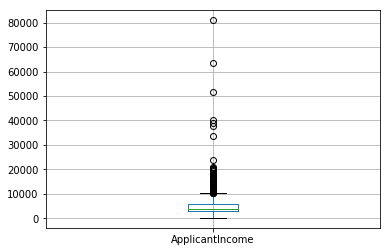

In [28]:
train_df.boxplot(column='ApplicantIncome')

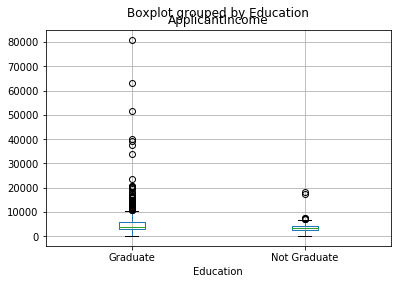

In [29]:
train_df.boxplot(column='ApplicantIncome',by='Education')

Mean Income for both Graduate and Not graduate is same. Graudate people have high income contributing to outliers.

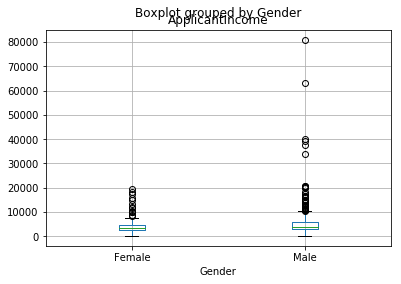

In [30]:
train_df.boxplot(column='ApplicantIncome',by='Gender')

We can see a lot of higher outliers for Male. Also the income for male is higher compared to Female. 

### CoapplicantIncome

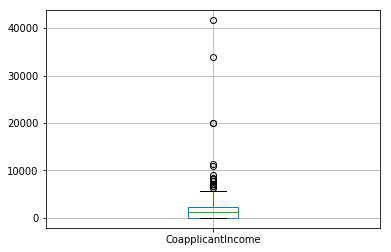

In [31]:
train_df.boxplot(column='CoapplicantIncome')

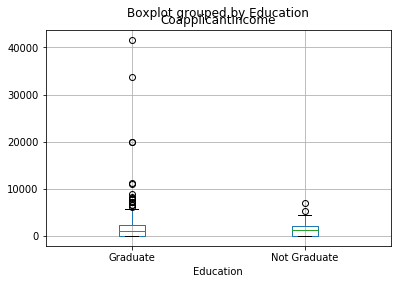

In [32]:
train_df.boxplot(column='CoapplicantIncome',by='Education')

Similar pattern is observed as ApplicantIncome

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C70B198>,
      dtype=object)

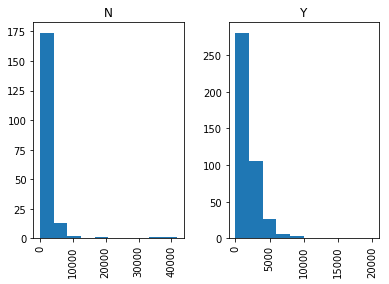

In [33]:
train_df.hist('CoapplicantIncome',by='Loan_Status')

We see different pattern for CoapplicantIncome influencing the loan status.

### LoanAmount

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C66A5C0>]],
      dtype=object)

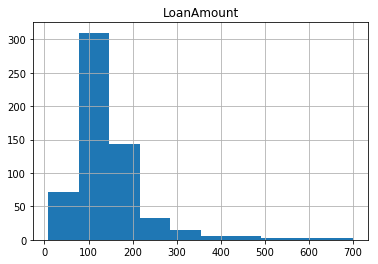

In [34]:
train_df.hist(column='LoanAmount')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C892F98>,
      dtype=object)

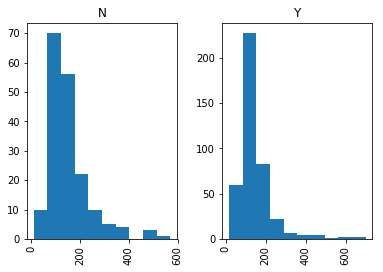

In [35]:
train_df.hist(column='LoanAmount',by='Loan_Status')

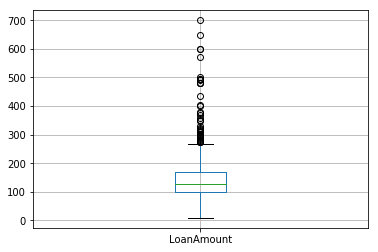

In [36]:
train_df.boxplot(column='LoanAmount')

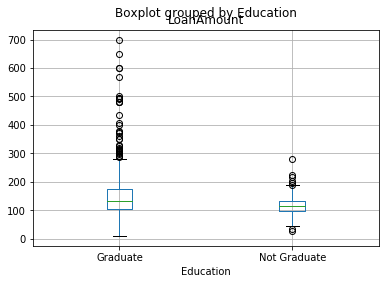

In [37]:
train_df.boxplot(column='LoanAmount',by='Education')

For Not Graduate there are two observation which are below the minimul level.

### Loan_Amount_Term

In [38]:
train_df.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

### Credit_History

In [39]:
train_df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


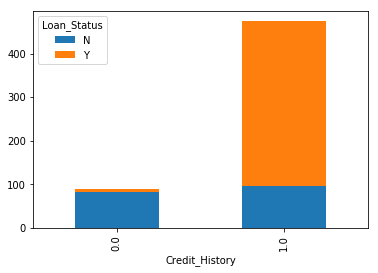

In [40]:
Credit_History_tab=pd.crosstab(train_df.Credit_History,columns=train_df.Loan_Status)
print(Credit_History_tab)
Credit_History_tab.plot(kind='bar',stacked=True)

Credit_History seems to be an important factor in loan decision, chances are high of getting loan if applicant have credit history  

<Figure size 720x720 with 0 Axes>

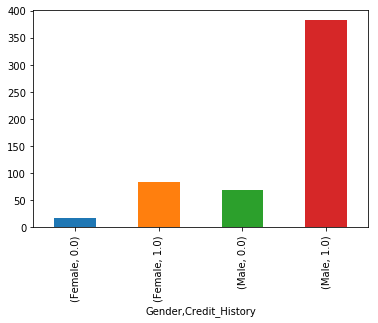

<Figure size 720x720 with 0 Axes>

In [41]:
grouby_tab=train_df.groupby(['Gender','Credit_History'])['Loan_Status'].count()
grouby_tab.plot(kind='bar')
plt.figure(figsize=(10,10))

### Property_Area

In [42]:
train_df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

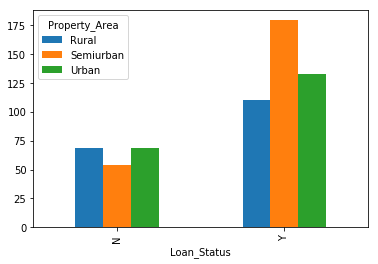

In [43]:
Property_Area_tab=pd.crosstab(train_df.Loan_Status,train_df.Property_Area)
Property_Area_tab.plot(kind='bar')

In [44]:
train_df.groupby('Property_Area').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Property_Area,,,,,
Rural,5554.083799,1645.536983,152.260116,345.531429,0.830303
Semiurban,5292.261803,1520.133047,145.504386,347.113043,0.861751
Urban,5398.247525,1716.350495,142.198953,332.800000,0.829670


## Missing Value Imputation

In [45]:
#Null count
train_df.apply(lambda x:sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Gender

In [46]:
train_df[train_df.Gender.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [47]:
train_df.loc[(train_df['Gender']=='Male') & (train_df['Married']=='Yes')].shape

(357, 13)

80% of the applicants are male in the dataset.From the Null columns of gender we can see that most are married. Also among 489 males 357 are married which are inline with the above records.
We can safely impute Gender missing values with the Mode value which is Male.

In [48]:
train_df.Gender.fillna(train_df.Gender.mode()[0],inplace=True)

### Married

In [49]:
train_df[train_df.Married.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [50]:
train_df.Married.fillna(train_df.Married.mode()[0],inplace=True)

### Dependents

In [51]:
train_df.Dependents.fillna(train_df.Dependents.mode()[0],inplace=True)

### Self_Employed

Since 86% of the values are 'No'it is safe to impute the missing values as “No” as there is a high probability of success.

In [52]:
train_df.Self_Employed.fillna(train_df.Self_Employed.mode()[0],inplace=True)

### LoanAmount

In [53]:
impute_grps=train_df.pivot_table(values=['LoanAmount'],index=['Gender','Married','Education','Self_Employed'])
impute_grps

LoanAmount
Gender Married Education    Self_Employed            
Female No      Graduate     No             117.724138
                            Yes            120.857143
               Not Graduate No              97.100000
                            Yes            137.333333
       Yes     Graduate     No             137.363636
                            Yes            330.333333
               Not Graduate No             120.400000
                            Yes            138.000000
Male   No      Graduate     No             139.564706
                            Yes            191.230769
               Not Graduate No              98.461538
                            Yes            146.000000
       Yes     Graduate     No             162.294118
                            Yes            178.871795
               Not Graduate No             124.869565
                            Yes            128.333333

In [54]:
for i,row in train_df.loc[train_df['LoanAmount'].isnull(),:].iterrows():
    tuple_=tuple([row['Gender'],row['Married'],row['Education'],row['Self_Employed']])
    train_df.loc[i,'LoanAmount']=impute_grps.loc[tuple_].values[0]

### Loan_Amount_Term

In [55]:
train_df.Loan_Amount_Term.fillna(train_df.Loan_Amount_Term.mode()[0],inplace=True)

### Credit_History

In [56]:
train_df.Credit_History.fillna(train_df.Credit_History.mode()[0],inplace=True)

## Feature Engineering

In [57]:
def nomCoding(col,dict):
    colCode=pd.Series(col,copy=True)
    for key,value in dict.items():
        colCode.replace(key,value,inplace=True)
    return colCode

In [58]:
#Gender
train_df["Gender"] = train_df["Gender"].apply(lambda sex: 0 if sex == 'Female' else 1)

In [59]:
#Married
train_df["Married"] = train_df["Married"].apply(lambda sex: 0 if sex == 'No' else 1)

In [60]:
#Married
train_df["Education"] = train_df["Education"].apply(lambda sex: 0 if sex == 'Not Graduate' else 1)

In [61]:
#Self_Employed
train_df["Self_Employed"] = train_df["Self_Employed"].apply(lambda sex: 0 if sex == 'No' else 1)

In [62]:
#Gender
#nomCoding(train_df['Gender'],{'Male':1,'Female':0})
#Married
#nomCoding(train_df['Married'],{'Yes':1,'No':0})
#Education
#nomCoding(train_df['Education'],{'Graduate':1,'Not Graduate':0})
#Self_Employed
#nomCoding(train_df['Self_Employed'],{'Yes':1,'No':0})
#print(" ")

In [63]:
def dummies(col,train_df):
    colDummies=pd.Series(col,copy=True)
    dummies=pd.get_dummies(colDummies,prefix=col.name)
    dummies.drop(dummies.columns[0], axis=1, inplace=True)
    train_df=pd.concat([train_df,dummies],axis=1)
    return train_df

In [64]:
#Property_Area
train_df=dummies(train_df['Property_Area'],train_df)

In [65]:
#Dependents
train_df=dummies(train_df['Dependents'],train_df)

In [66]:
# Lets Create a new feature of Total Income
train_df['Total_Income']=train_df['ApplicantIncome']+train_df['CoapplicantIncome']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DD6A0B8>]],
      dtype=object)

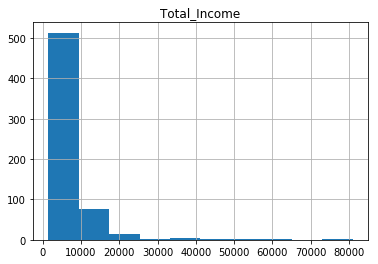

In [67]:
train_df.hist('Total_Income')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DDE2978>]],
      dtype=object)

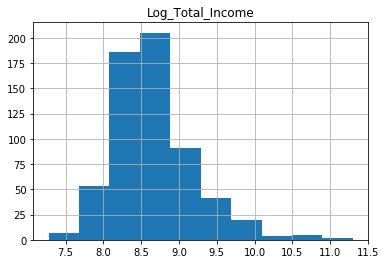

In [68]:
#Lets take log transform of total Income
train_df['Log_Total_Income']=np.log(train_df['Total_Income'])
train_df.hist('Log_Total_Income')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DE12550>]],
      dtype=object)

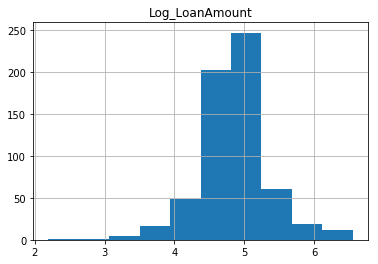

In [69]:
#Similarly log transform of Loan Amount
train_df['Log_LoanAmount']=np.log(train_df['LoanAmount'])
train_df.hist('Log_LoanAmount')

## Model Prediction

In [162]:
#Defining a function to provide Accuracy score and Confusion Matrix for different algos 
modeldict={}
error=[]
def model(model,name,X,y,data):
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=123)
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    accuracy=metrics.accuracy_score(y_test,ypred)
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
    print("Confusion Matrix: ",metrics.confusion_matrix(y_test,ypred))
    modeldict.update({name:accuracy})
    
    #perform K Fold cross validation with 5 folds
    kf=KFold(data.shape[0],n_folds=5)
    for train_index,val_index in kf:
        kf_X_train=X.iloc[train_index,:]
        kf_X_test=X.iloc[val_index,:]
        kf_y_train=y.iloc[train_index,:]
        kf_y_test=y.iloc[val_index,:]
        model.fit(kf_X_train,kf_y_train)
        error.append(model.score(kf_X_test,kf_y_test))
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))


        
        

In [163]:
#model 1
X=train_df[['Credit_History']]
y=train_df[['Loan_Status']]
logreg=LogisticRegression()
model(logreg,'LR1',X,y,train_df)

Accuracy : 77.273%
Confusion Matrix:  [[22 32]
 [ 3 97]]
Cross-Validation Score : 80.946%


In [72]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Property_Area,Loan_Status,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Total_Income,Log_Total_Income,Log_LoanAmount
0,LP001002,1,0,0,1,0,5849,0.0,139.564706,360.0,...,Urban,Y,0,1,0,0,0,5849.0,8.674026,4.938528
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,...,Rural,N,0,0,1,0,0,6091.0,8.714568,4.852030
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,...,Urban,Y,0,1,0,0,0,3000.0,8.006368,4.189655
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,...,Urban,Y,0,1,0,0,0,4941.0,8.505323,4.787492
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,...,Urban,Y,0,1,0,0,0,6000.0,8.699515,4.948760


## Randomized Search

In [135]:
def RandomizedSearchCVmodel(model,score,iteration,param_dist,X,y):
    random_search =RandomizedSearchCV(model,param_distributions=param_dist,cv=5,scoring=score,n_iter=iteration)
    random_search.fit(X,y)
    print(random_search.grid_scores_)
    print(random_search.best_estimator_)

### Logistic Regression

In [74]:
#1st Set
param_dist = {"penalty": ['l1', 'l2'],
              "C": [0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
logreg=LogisticRegression()
X=train_df[['Credit_History','Property_Area_Semiurban','Property_Area_Urban']]
y=train_df.Loan_Status

In [75]:
RandomizedSearchCVmodel(logreg,'accuracy',14,param_dist,X,y)

[mean: 0.80945, std: 0.03206, params: {'penalty': 'l1', 'C': 0.4}, mean: 0.80945, std: 0.03206, params: {'penalty': 'l2', 'C': 0.4}, mean: 0.80945, std: 0.03206, params: {'penalty': 'l1', 'C': 0.5}, mean: 0.80945, std: 0.03206, params: {'penalty': 'l2', 'C': 0.5}, mean: 0.80945, std: 0.03206, params: {'penalty': 'l1', 'C': 0.6}, mean: 0.80945, std: 0.03206, params: {'penalty': 'l2', 'C': 0.6}, mean: 0.80945, std: 0.03206, params: {'penalty': 'l1', 'C': 0.7}, mean: 0.80945, std: 0.03206, params: {'penalty': 'l2', 'C': 0.7}, mean: 0.80945, std: 0.03206, params: {'penalty': 'l1', 'C': 0.8}, mean: 0.80945, std: 0.03206, params: {'penalty': 'l2', 'C': 0.8}, mean: 0.80945, std: 0.03206, params: {'penalty': 'l1', 'C': 0.9}, mean: 0.80945, std: 0.03206, params: {'penalty': 'l2', 'C': 0.9}, mean: 0.80945, std: 0.03206, params: {'penalty': 'l1', 'C': 1.0}, mean: 0.80945, std: 0.03206, params: {'penalty': 'l2', 'C': 1.0}]
LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True

In [76]:
#model 1
X=train_df[['Credit_History','Property_Area_Semiurban','Property_Area_Urban']]
y=train_df[['Loan_Status']]
logreg=LogisticRegression(C=0.4,penalty='l1')
model(logreg,'LR2',X,y,train_df)

Accuracy : 77.273%
Confusion Matrix:  [[22 32]
 [ 3 97]]
Cross-Validation Score : 80.946%


In [97]:
#Model 2
X=train_df[['Credit_History','Dependents_1','Dependents_2','Dependents_3+','Loan_Amount_Term','CoapplicantIncome']]
y=train_df[['Loan_Status']]
logreg=LogisticRegression(C=0.4,penalty='l2')
model(logreg,'LR3',X,y,train_df)

Accuracy : 77.273%
Confusion Matrix:  [[22 32]
 [ 3 97]]
Cross-Validation Score : 80.240%


Since the Accuracy dint increase and Cross-Validation Score is decreasing after adding more params, it is overfitting the model.

### DecisionTreeClassifier

In [104]:
#param_dist = {"penalty": ['l1', 'l2'],
              #"C": [0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
decisionTree=DecisionTreeClassifier()
X=train_df[['Credit_History']]
y=train_df[['Loan_Status']]
model(decisionTree,'LR4',X,y,train_df)

Accuracy : 77.273%
Confusion Matrix:  [[22 32]
 [ 3 97]]
Cross-Validation Score : 79.013%


### RandomForestClassifier

In [169]:
X=train_df[['Gender', 'Married', 'Dependents_1','Dependents_2','Dependents_3+', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area_Urban','Property_Area_Semiurban',
        'Log_LoanAmount','Log_Total_Income']]
y=train_df[['Loan_Status']]
randomForest=RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
model(randomForest,'LR5',X,y,train_df)

Accuracy : 76.623%
Confusion Matrix:  [[ 18  36]
 [  0 100]]
Cross-Validation Score : 79.750%


In [178]:
scaler=StandardScaler()
X_Scaled=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,y)
randomForest.fit(X_train,y_train)
metrics.accuracy_score(y_test,randomForest.predict(X_test))

0.7857142857142857

In [179]:
randomForest.score(X_test,y_test)

0.7857142857142857